## Integration of the Lennard-Jones system with a six-order Gear integrator

In [1]:
include("../src/GearIntegration.jl")
using  GearIntegration
using PyPlot

**Set data**

In [2]:
N = 256
rho = 0.8
dt = 0.005
T = 1.5
runtime = 100.0
Q = 1.0
thermostat = "Gaussian";

**Run simulation** (It takes a while depending on your machine). 
Tests on a machine
* Intel(R) Core(TM) i7-4510U CPU @ 2.00GHz
* 8 GB RAM

Average time
* 10 min 

In [3]:
time, energy, kinetic, potential, temperature, invariant, atoms, zetas,nus, p, q = 
GearIntegration.run(runtime, rho, dt, T, N, Q, thermostat);

time
0.0
0.005
0.01
0.015
0.02
0.025
0.03
0.035
0.04
0.045
0.05
0.055
0.06
0.065
0.07
0.075
0.08
0.085
0.09
0.095
0.1
0.105
0.11
0.115
0.12
0.125
0.13
0.135
0.14
0.145
0.15
0.155
0.16
0.165
0.17
0.17500000000000002
0.18
0.185
0.19
0.195
0.2
0.20500000000000002
0.21
0.215
0.22
0.225
0.23
0.23500000000000001
0.24
0.245
0.25
0.255
0.26
0.265
0.27
0.275
0.28
0.28500000000000003
0.29
0.295
0.3
0.305
0.31
0.315
0.32
0.325
0.33
0.335
0.34
0.34500000000000003
0.35000000000000003
0.355
0.36
0.365
0.37
0.375
0.38
0.385
0.39
0.395
0.4
0.405
0.41000000000000003
0.41500000000000004
0.42
0.425
0.43
0.435
0.44
0.445
0.45
0.455
0.46
0.465
0.47000000000000003
0.47500000000000003
0.48
0.485
0.49
0.495
0.5
0.505
0.51
0.515
0.52
0.525
0.53
0.535
0.54
0.545
0.55
0.555
0.56
0.5650000000000001
0.5700000000000001
0.5750000000000001
0.58
0.585
0.59
0.595
0.6
0.605
0.61
0.615
0.62
0.625
0.63
0.635
0.64
0.645
0.65
0.655
0.66
0.665
0.67
0.675
0.68
0.685
0.6900000000000001
0.6950000000000001
0.7000000000000001
0.7

### Data analysis

In [4]:
stepeq = 1500
T = temperature
E = energy
K = kinetic
U = potential;

**Heat capacity**

In [5]:
e = E[stepeq:end]; temp = T[stepeq:end];
flucte = mean((e - mean(e)).^2)
Cv = flucte/(N*mean(temp)^2)

3.6345331809563195

**Covariance**

In [6]:
k = K[stepeq:end]; u = U[stepeq:end];
cov = mean((k - mean(k)).* (u - mean(u)))/(N*mean(temp)^2)

-0.00030078156418384777

**Figures**

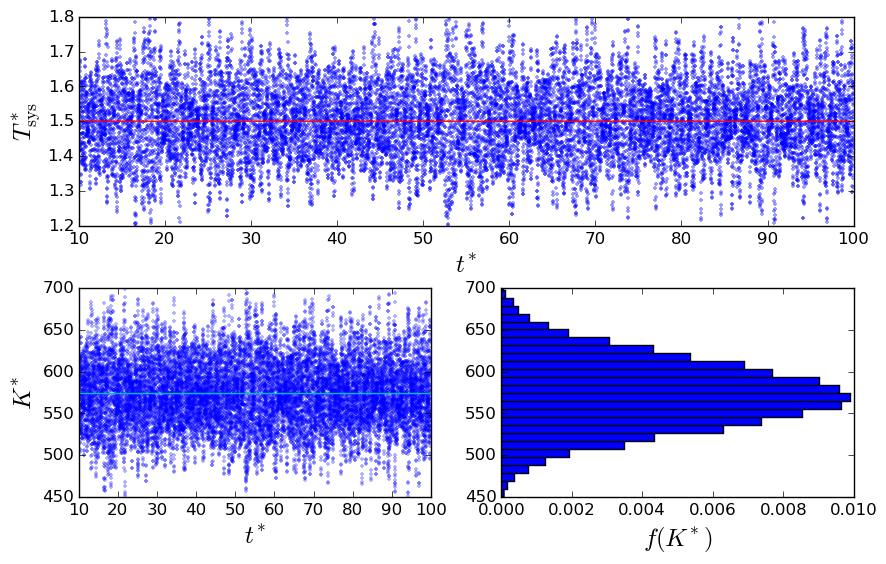

In [11]:
timered = time[stepeq:end];
meank = mean(k)*ones(timered);

if thermostat == "Logistic"
    color = "m"
    elseif thermostat == "Gaussian"
    color = "b"
    elseif thermostat == "Quartic"
    color = "g"
end

fig = plt[:figure](figsize=(10,6))
fig[:subplots_adjust](hspace=.3)

meanT = mean(T[stepeq:end])

ax1 = plt[:subplot2grid]((2,2), (0,0), colspan=2)
ax2 =  plt[:subplot2grid]((2,2), (1,0))
ax3 =  plt[:subplot2grid]((2,2), (1,1))

ax1[:plot](timered,T[stepeq:end],"$color.", alpha =0.4, markeredgewidth=0.)
ax1[:plot](timered,meanT*ones(timered),"r")
ax1[:set_xlim](10.,100)
ax1[:set_ylim](1.2,1.8)
ax1[:set_ylabel](L"$T_{\rm sys}^*$",fontsize="18")
ax1[:set_xlabel](L"$t^*$",fontsize="18")

ax2[:plot](timered, k,"$color.", alpha =0.3, markeredgewidth=0.)
ax2[:plot](timered, meank,"c")
ax2[:set_xlim](10.,100)
ax2[:set_ylim](450,700)
ax2[:set_ylabel](L"$K^*$",fontsize="18")
ax2[:set_xlabel](L"$t^*$",fontsize="18")

ax3[:hist](k, 30, normed =1, color = "$color",orientation = "horizontal")
ax3[:set_ylim](450,700)
ax3[:set_xlabel](L"$f(K^*)$",fontsize="18")

#plt[:savefig]("$(thermostat)15.png")
plt[:show]()

## Invariant

In [12]:
inv = invariant[stepeq:end];
invred = (inv - inv[1])./inv[1];
t = time[stepeq:end];

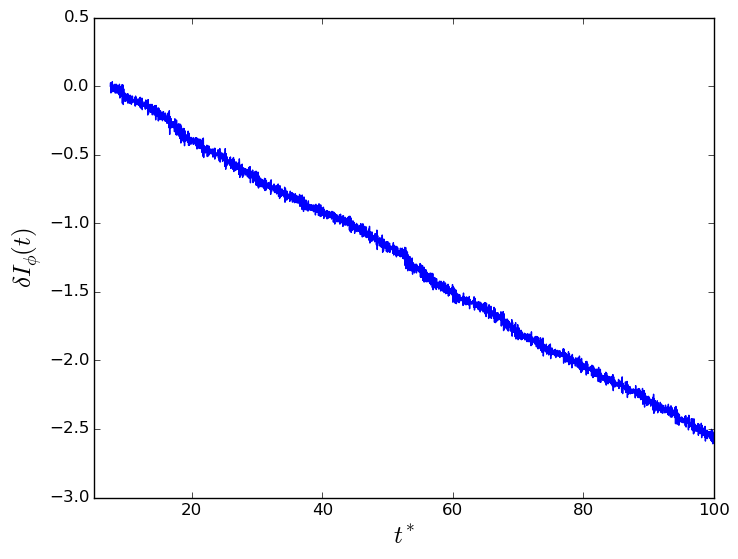

(5.0,100.0)

In [13]:
plot(t,invred)
plt[:xlabel](L"t^*", fontsize =18)
plt[:ylabel](L"\delta I_{\phi}(t)", fontsize = 18)
plt[:xlim](5.,100.)